In [1]:
import Acquire as a
import prepare as p

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = a.acquire_data()
train, validate, test = p.split(df)

In [3]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_of_wine
3737,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,5,White
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,Red
2200,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,6,White
4139,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,5,White
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7,Red


In [5]:
p.overview(train)

--- Shape: (3637, 13)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3637 entries, 3737 to 548
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3637 non-null   float64
 1   volatile acidity      3637 non-null   float64
 2   citric acid           3637 non-null   float64
 3   residual sugar        3637 non-null   float64
 4   chlorides             3637 non-null   float64
 5   free sulfur dioxide   3637 non-null   float64
 6   total sulfur dioxide  3637 non-null   float64
 7   density               3637 non-null   float64
 8   pH                    3637 non-null   float64
 9   sulphates             3637 non-null   float64
 10  alcohol               3637 non-null   float64
 11  quality               3637 non-null   int64  
 12  type_of_wine          3637 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 397.8+ KB
--- Column Descriptions
      

# Univariate analysis

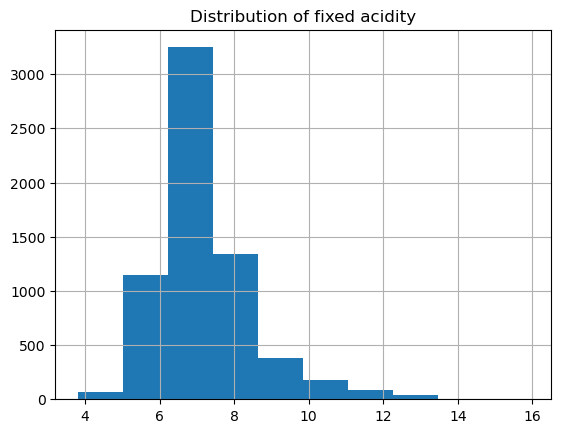

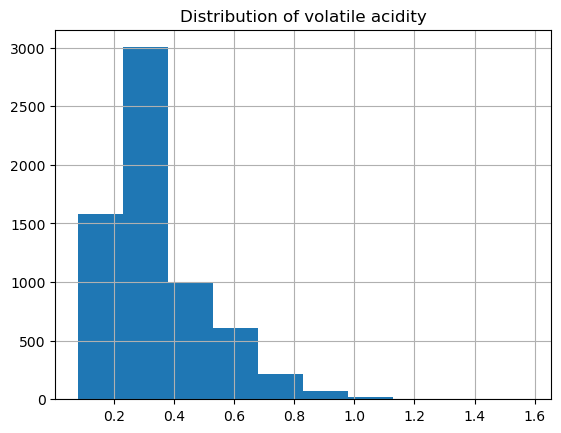

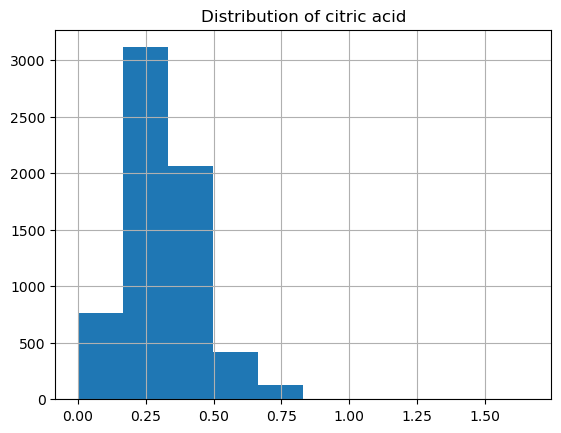

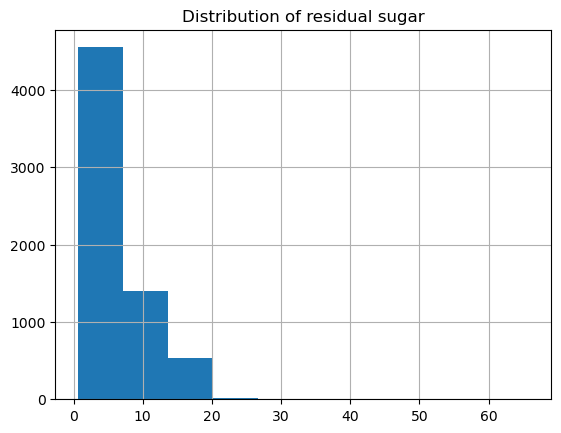

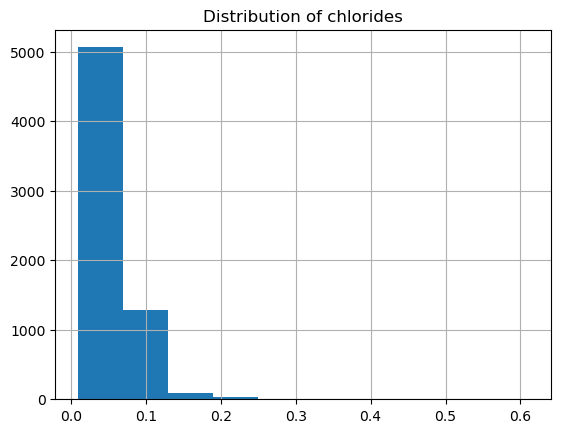

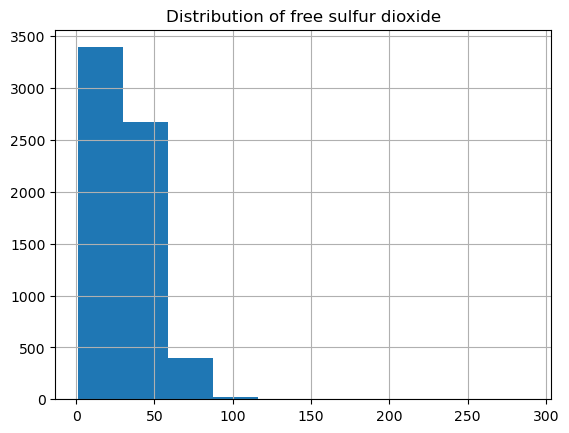

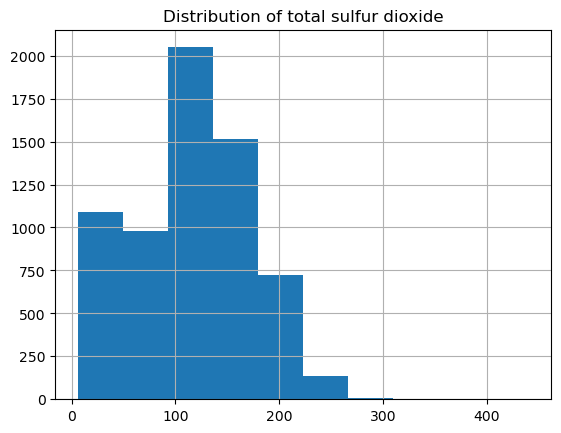

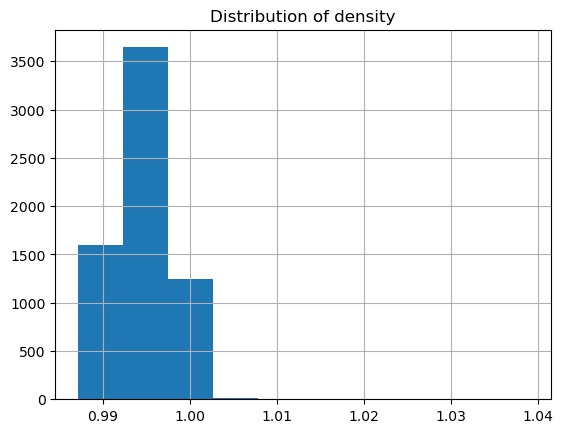

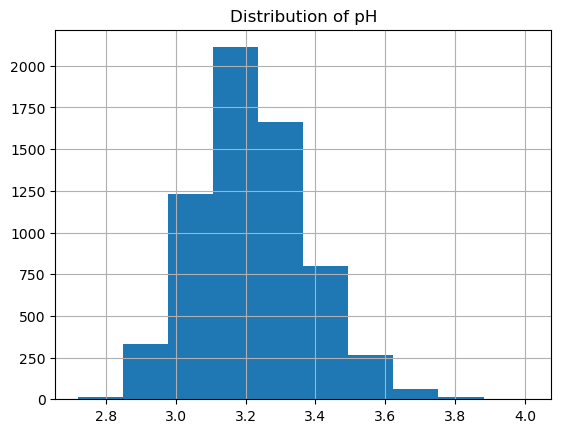

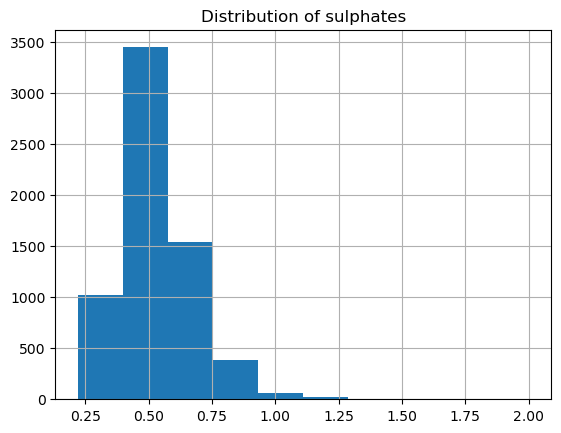

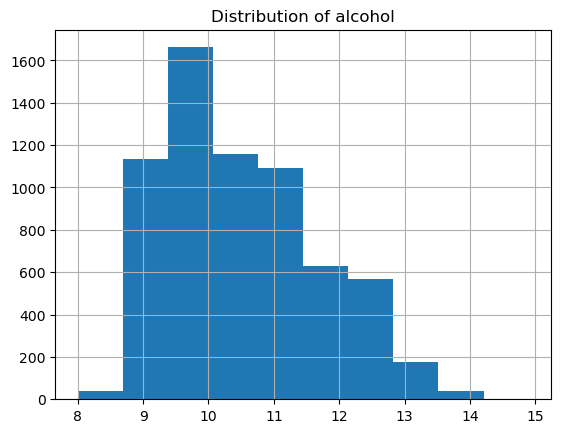

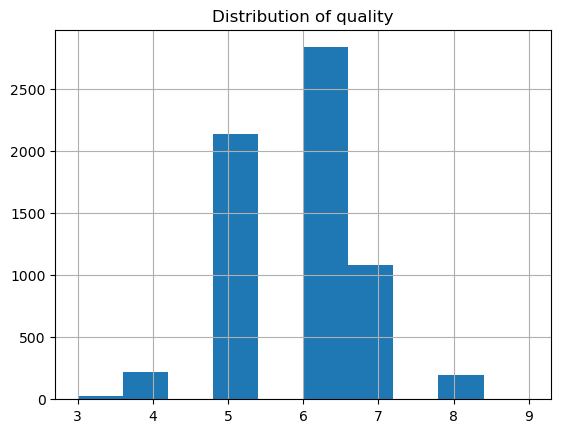

In [26]:
for col in df.columns[:-1]:
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

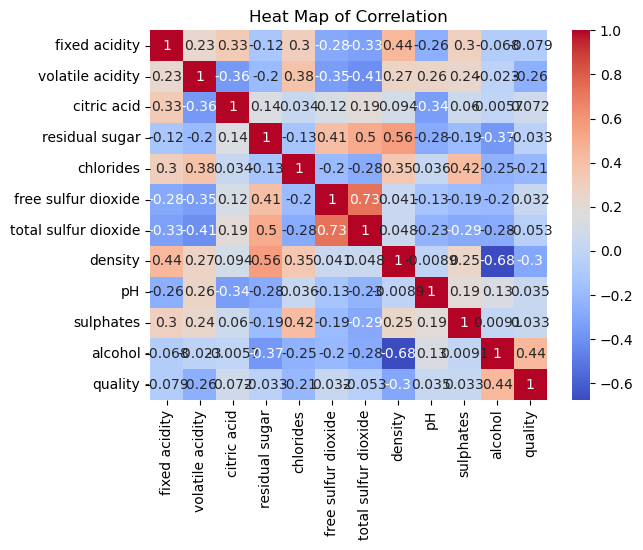

In [6]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map of Correlation')
plt.show()

In [13]:
def get_pairplot(df):
    '''
    This function will take in a dataFrame, and will display a pairplot of the variable
    relationships along with a regression line for each pair
    '''
    # take a sample of the dataFrame in order to cut down computing time
    plt.figure(figsize=(20,20))
    sample = df.sample(500)
    # create a pairplot
    sns.pairplot(data=sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    plt.show()

<Figure size 2000x2000 with 0 Axes>

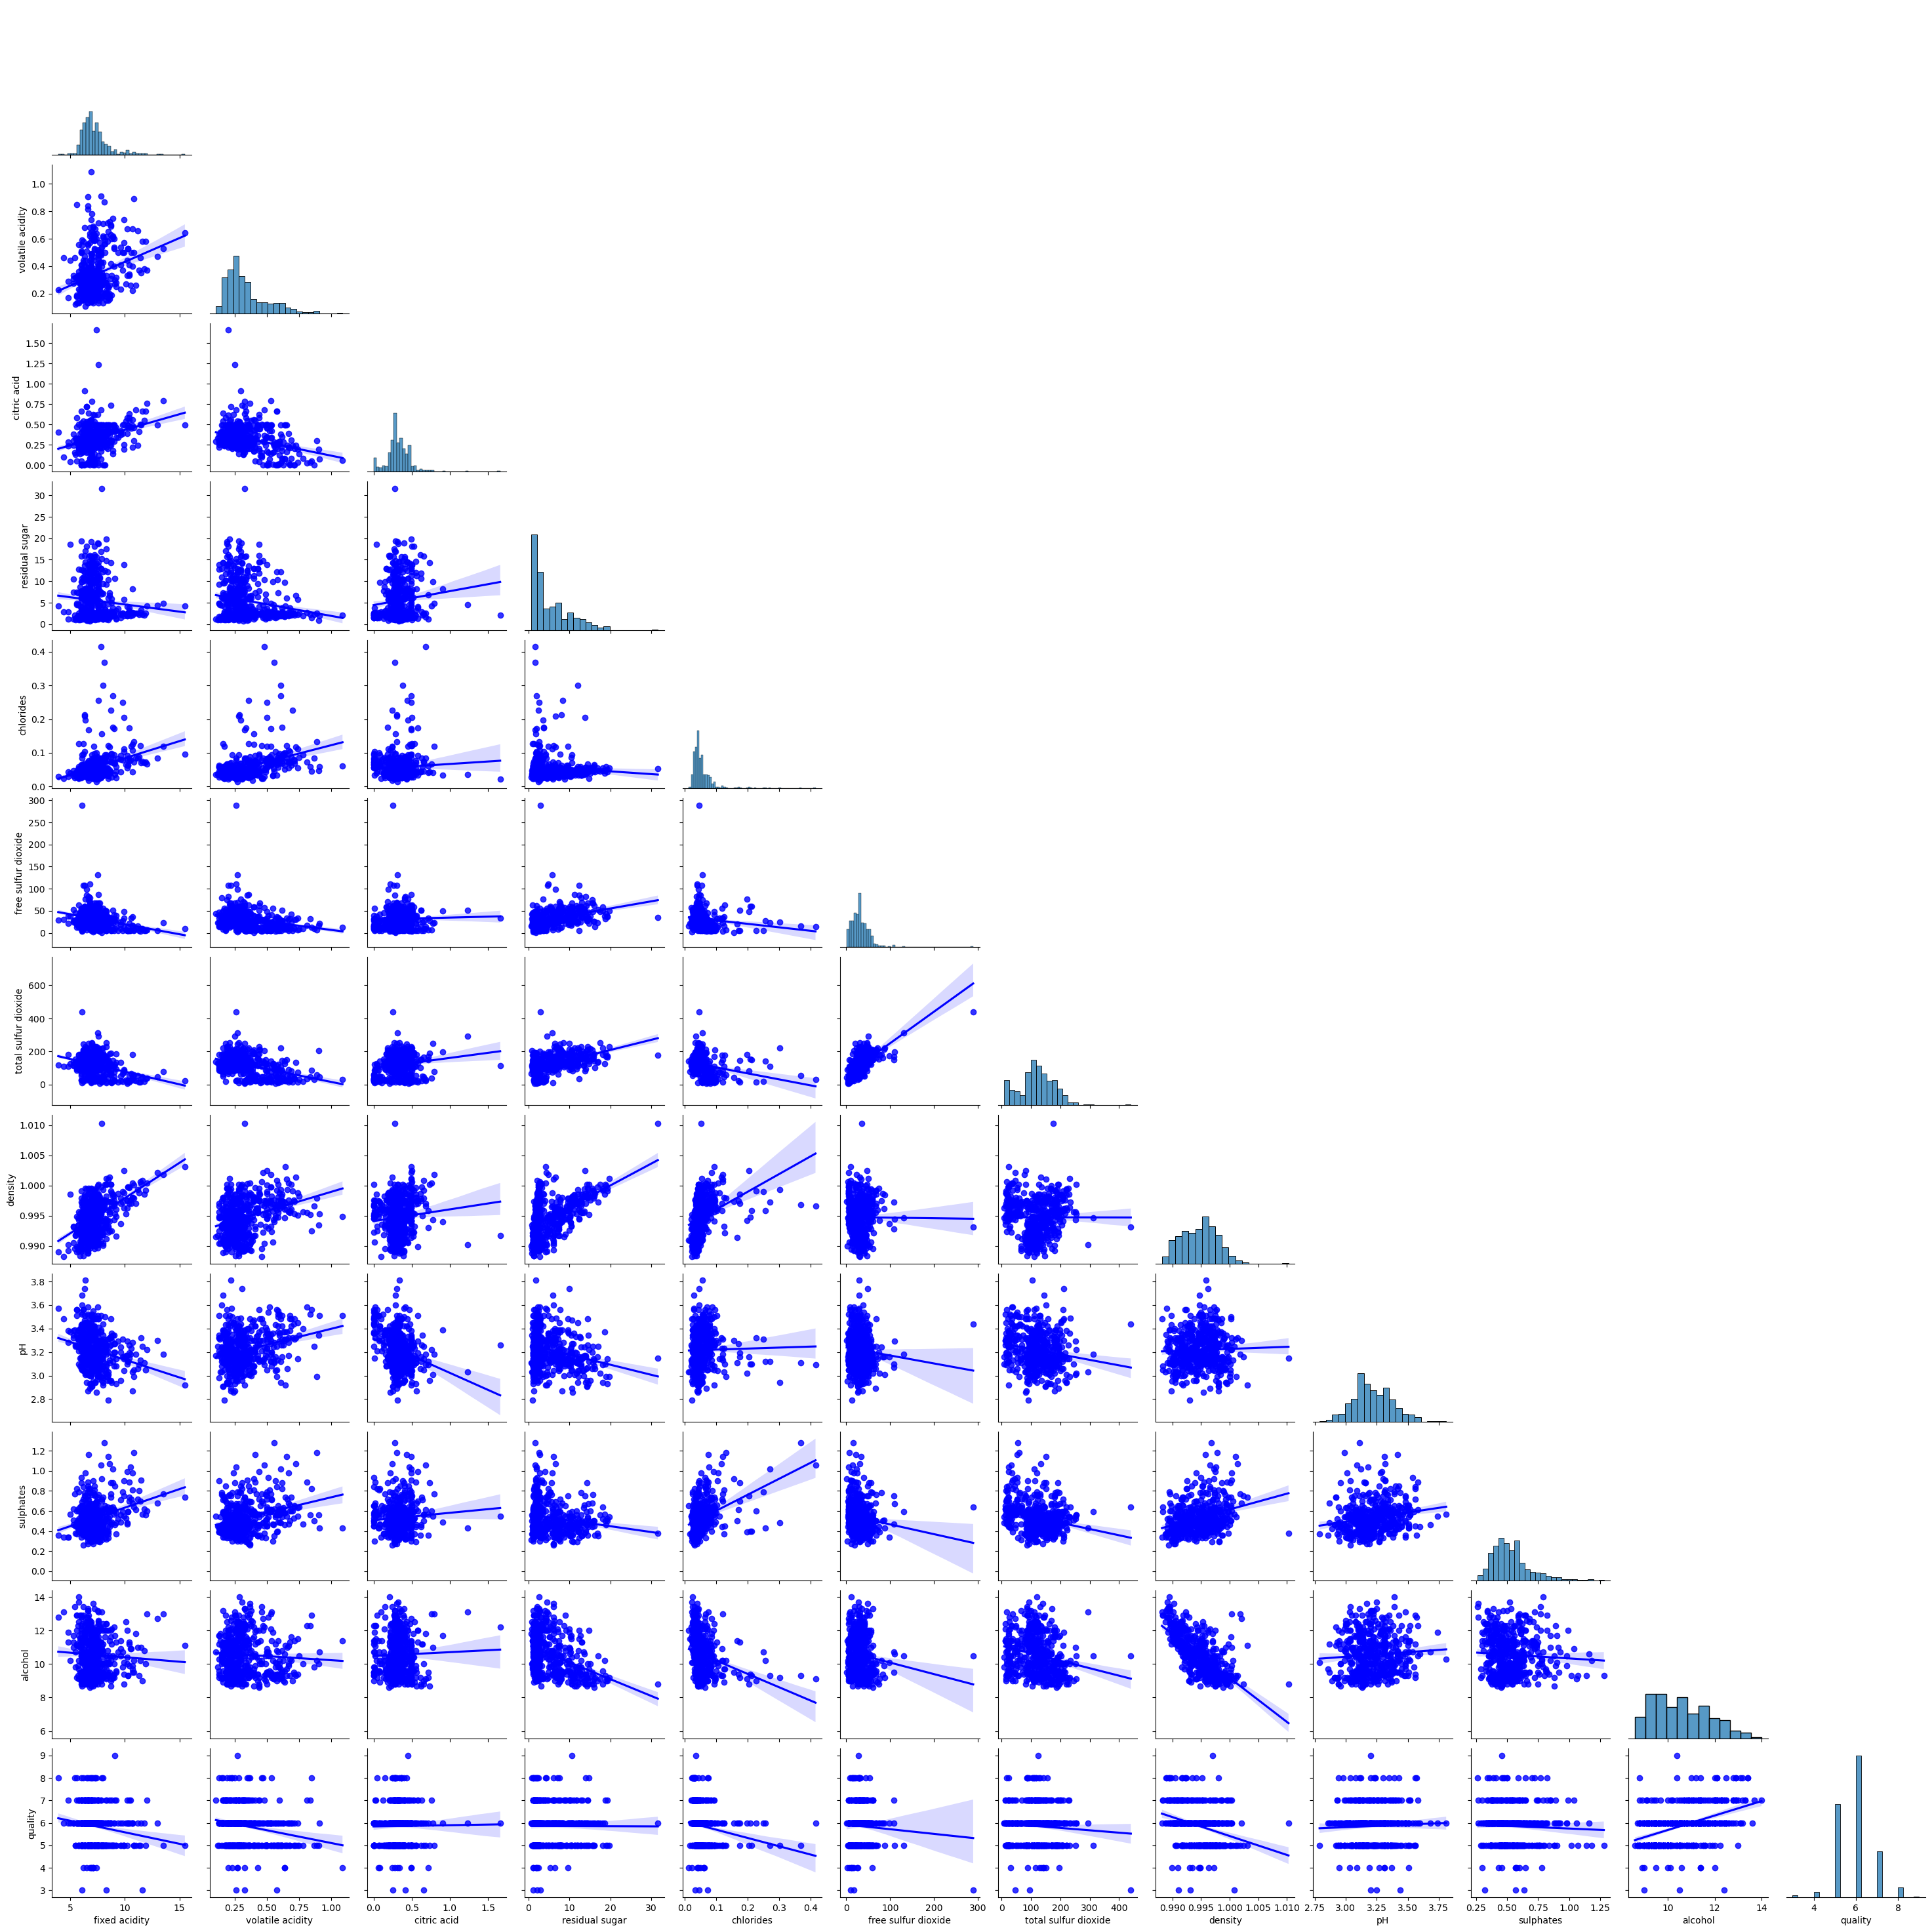

In [14]:
get_pairplot(train)

### Looks like strong correlations to quality on 'volatile acidity', 'chlorides', 'density' and 'alcohol'

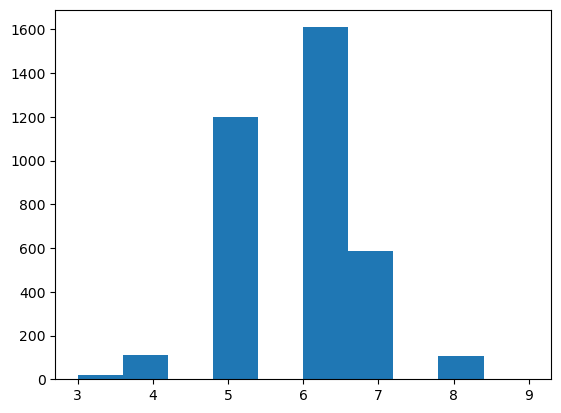

In [23]:
plt.hist(data=train, x='quality');

quality is not very normally distributed

## Does 'volatile acidity' have a correlation with quality?

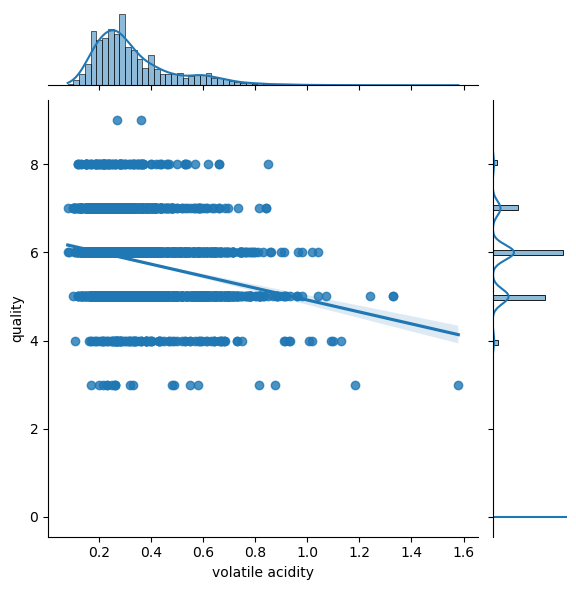

In [21]:
sns.jointplot(data=train, x='volatile acidity', y='quality', kind='reg')
plt.axhline()
plt.show()

Is there a statistial correlation?
- volatile acidity is a continuous variable with right skew
- quality appears to be a ordinal variable 
- we are looking to do a regression test

In [ ]:
stats.()

In [ ]:
sns.jointplot(data=train.sample(1000), x='volatile acidity', y='quality', kind='reg')
plt.axhline()
plt.show()